In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import pydub
import librosa

from scipy import signal

In [2]:
%matplotlib notebook

In [3]:
%matplotlib inline

In [4]:
def freqz(b):
    w, h = signal.freqz(b, 1)

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    plt.plot(w, abs(h))
    ax2 = ax1.twinx()
    plt.plot(w, np.unwrap(np.angle(h)), color='orange')

In [5]:
sample_dir = 'C:\\Users\\ghage\\Downloads\\beat_detection_samples\\'
sample_song = 'bensound-erf.mp3'
print(sample_dir+sample_song)

C:\Users\ghage\Downloads\beat_detection_samples\bensound-erf.mp3


In [6]:
song = pydub.AudioSegment.from_mp3(sample_dir + sample_song)

In [7]:
fs = song.frame_rate * song.sample_width
fs

88200

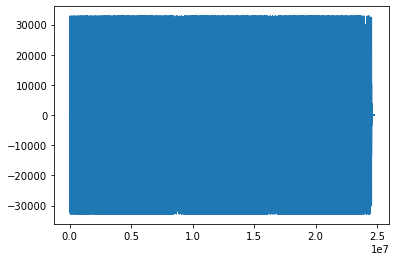

In [8]:
raw = np.array(song.get_array_of_samples())
plt.plot(raw)

In [9]:
audio_full = raw

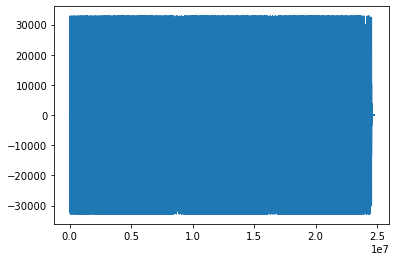

In [10]:
plt.plot(audio_full)

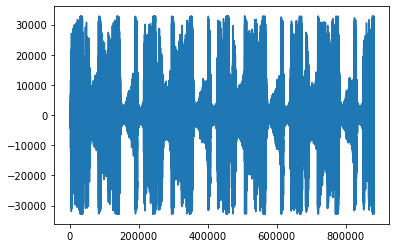

In [11]:
audio = audio_full[1000000:1000000 + 10*fs]
l = len(audio)
plt.plot(audio)

In [12]:
fft_n = 2**int(np.ceil(np.log2(l)))
fft_n, l

(1048576, 882000)

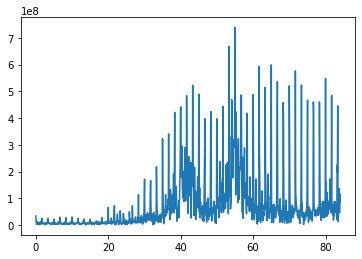

In [13]:
fft_audio = np.fft.fft(audio, n=fft_n)[:fft_n//2]
f_axis = np.linspace(0, fs//2, fft_n//2)
plt.plot(f_axis[:1000], abs(fft_audio[:1000]))

In [14]:
sd.play(audio, fs)

In [15]:
sd.stop()

In [16]:
b = signal.firwin(100, 10000, fs=fs)

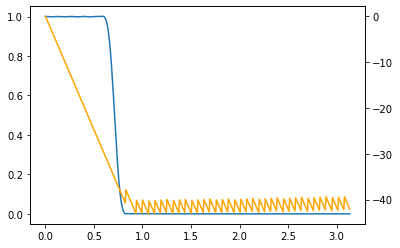

In [17]:
w, h = signal.freqz(b, 1)

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.plot(w, abs(h))
ax2 = ax1.twinx()
plt.plot(w, np.unwrap(np.angle(h)), color='orange')

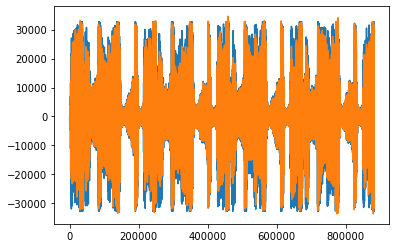

In [18]:
lpf_audio = signal.lfilter(b, 1, audio)
plt.plot(audio)
plt.plot(lpf_audio)

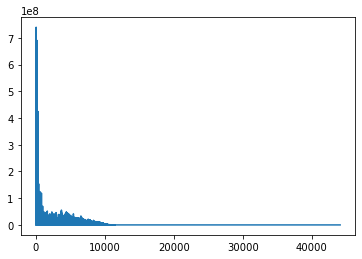

In [19]:
fft_lpf_audio = np.fft.fft(lpf_audio, n=fft_n)[:fft_n//2]
f_axis = np.linspace(0, fs//2, fft_n//2)
plt.plot(f_axis[:], abs(fft_lpf_audio[:]))

In [20]:
sd.play(lpf_audio, fs)

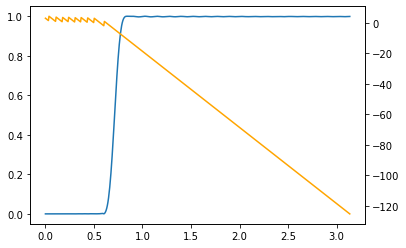

In [21]:
b = signal.firwin(101, 10000, fs=fs, pass_zero=False)
freqz(b)

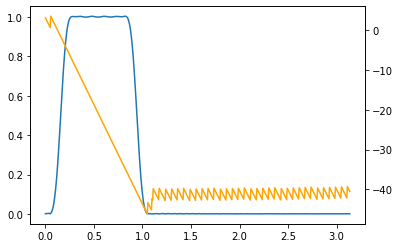

In [22]:
b = signal.firwin(101, [0.05, 0.3], pass_zero=False)
freqz(b)

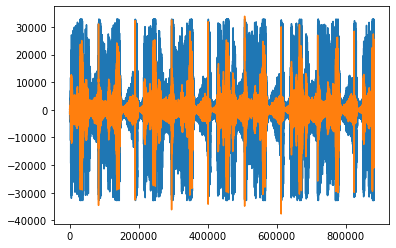

In [23]:
bpf_audio = signal.lfilter(b, 1, audio)
plt.plot(audio)
plt.plot(bpf_audio)

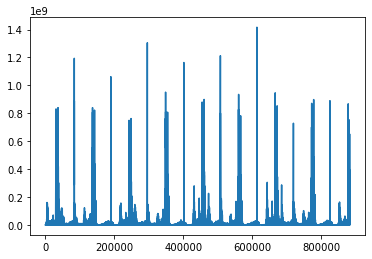

In [24]:
plt.plot(bpf_audio**2)

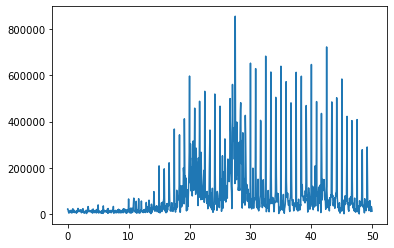

In [25]:
f_axis = np.linspace(0, fs//2, len(bpf_audio))
plt.plot(f_axis[:1000], abs(np.fft.fft(bpf_audio))[:1000])

In [26]:
peak_range = [i * fs for i in np.linspace(0.5, 100, 100)]
# peaks_cwt = signal.find_peaks_cwt(bpf_audio, peak_range)

In [27]:
peaks, properties = signal.find_peaks(bpf_audio, prominence=(10000, None), distance=fs/20)

In [28]:
properties['prominences'].max()

69976.90805920932

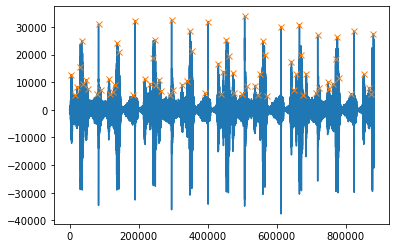

In [29]:
plt.plot(bpf_audio)
plt.plot(peaks, bpf_audio[peaks], 'x')

In [30]:
dpeaks = peaks[1:] - peaks[:-1]
fs / np.mean(dpeaks) * 60 / 4

110.32291891558461

In [31]:
librosa.beat.tempo(bpf_audio.astype(float), fs)

array([134.23295455])

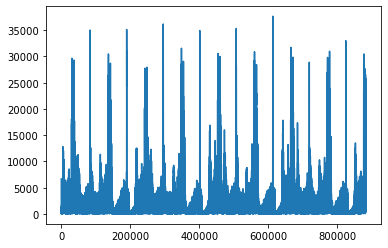

In [32]:
plt.plot(abs(signal.hilbert(bpf_audio)))

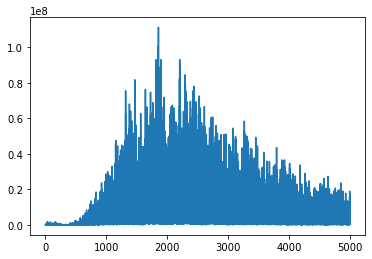

In [33]:
plt.plot(np.linspace(0, fs/2, len(audio))[:100000], abs(np.fft.fft((signal.hilbert(bpf_audio))))[:100000])

In [49]:
peak_range = np.array([fs / i for i in np.linspace(100, 0.5, 10)])
peak_range
peaks_cwt = signal.find_peaks_cwt(bpf_audio[::100], [10])

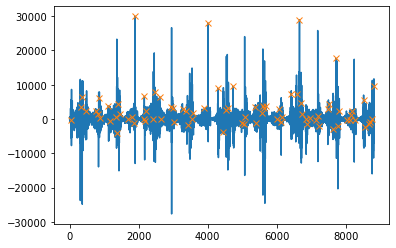

In [50]:
bpf_audio_small = bpf_audio[::100]
plt.plot(bpf_audio_small)
plt.plot(peaks_cwt, bpf_audio_small[peaks_cwt], 'x')